In [1]:
# Instalando pacotes Python utilizando o comando pip:

# pandas: Pacote para manipulação e análise de dados.
# numpy: Biblioteca para computação numérica em Python.
# sidetable: Ferramenta para criar tabelas de resumo de dados em Pandas.
# seaborn: Biblioteca para visualização de dados baseada em Matplotlib.
# plotly: Biblioteca para criar gráficos interativos.
# matplotlib: Biblioteca para criação de gráficos estáticos em Python.
# scikit-learn: Biblioteca para aprendizado de máquina em Python.
# scipy: Biblioteca para matemática, ciência e engenharia.
# yellowbrick: Biblioteca para visualização de dados em machine learning.
# nbformat: Biblioteca para manipulação de notebooks Jupyter.
# pip list: Exibe uma lista dos pacotes Python instalados e suas versões.

%pip install pandas
%pip install numpy
%pip install sidetable
%pip install seaborn
%pip install plotly
%pip install matplotlib
%pip install -U scikit-learn
%pip install scipy
%pip install yellowbrick
%pip install nbformat
%pip list





Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Package                   Version
------------------------- ------------
arrow                     1.3.0
asttokens                 2.4.1
attrs                     23.1.0
binaryornot               0.4.4
blinker                   1.7.0
certifi                   2023.11.17
chardet                   5.2.0
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm  

In [96]:
# Importando bibliotecas e pacotes necessários para a análise de clusters:

# pandas: Pacote para manipulação e análise de dados.
# numpy: Biblioteca para computação numérica em Python.
# sidetable: Ferramenta para criar tabelas de resumo de dados em Pandas.
# string: Módulo contendo operações com strings.
# seaborn: Biblioteca para visualização de dados baseada em Matplotlib.
# plotly.express: Pacote para visualização de dados baseado em Plotly.
# matplotlib.pyplot: Módulo para criação de gráficos estáticos em Python.
# make_blobs: Função do scikit-learn para gerar conjuntos de dados sintéticos com clusters.
# GaussianMixture: Modelo de mistura gaussiana do scikit-learn para clustering.
# KMeans: Algoritmo K-Means do scikit-learn para clustering.
# AgglomerativeClustering: Algoritmo de clustering aglomerativo do scikit-learn.
# StandardScaler: Pré-processador do scikit-learn para padronização de dados.
# scale: Função do scikit-learn para padronização de dados.
# PowerTransformer: Pré-processador do scikit-learn para transformação de energia (Power Transform).
# silhouette_score: Métrica do scikit-learn para avaliação de clusters baseada em silhueta.
# davies_bouldin_score: Métrica do scikit-learn para avaliação de clusters baseada em Davies-Bouldin.
# calinski_harabasz_score: Métrica do scikit-learn para avaliação de clusters baseada em Calinski-Harabasz.
# linkage: Função do scipy para calcular uma matriz de ligação hierárquica para clustering aglomerativo.
# dendrogram: Função do scipy para plotar um dendrograma a partir de uma matriz de ligação hierárquica.
# fcluster: Função do scipy para realizar clustering aglomerativo com base na matriz de ligação hierárquica.
# kelbow_visualizer: Ferramenta Yellowbrick para visualização do "cotovelo" para determinação do número ideal de clusters.

import pandas as pd
import numpy as np
import sidetable
import string

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, scale, PowerTransformer

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from yellowbrick.cluster import kelbow_visualizer

In [3]:
# Carregando dados de um arquivo CSV para um DataFrame:

# Utilizando a função read_csv do pandas para ler dados de um arquivo CSV chamado "data.csv".
# O parâmetro encoding='latin-1' é especificado para lidar com caracteres especiais.
# Imprimindo a forma (shape) do DataFrame e exibindo as primeiras linhas.
df = pd.read_csv("data.csv", encoding='latin-1')
print(df.shape)
df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data understanding

In [4]:
# Obtendo informações sobre o DataFrame:

# Utilizando o método info() do pandas para obter informações sobre o DataFrame, incluindo tipos de dados, valores não nulos e uso de memória.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Ordenando a coluna 'InvoiceNo' do DataFrame:

# Utilizando o método sort_values() do pandas para ordenar a coluna 'InvoiceNo' em ordem crescente.
df.InvoiceNo.sort_values()


0          536365
1          536365
2          536365
3          536365
4          536365
           ...   
540449    C581490
541541    C581499
541715    C581568
541716    C581569
541717    C581569
Name: InvoiceNo, Length: 541909, dtype: object

In [6]:
# Contando o número de valores únicos nas colunas 'Description' e 'Country' do DataFrame:

# Utilizando o método nunique() do pandas para contar o número de valores únicos nas colunas 'Description' e 'Country'.
df[['Description', 'Country']].nunique()


Description    4223
Country          38
dtype: int64

<Axes: ylabel='Country'>

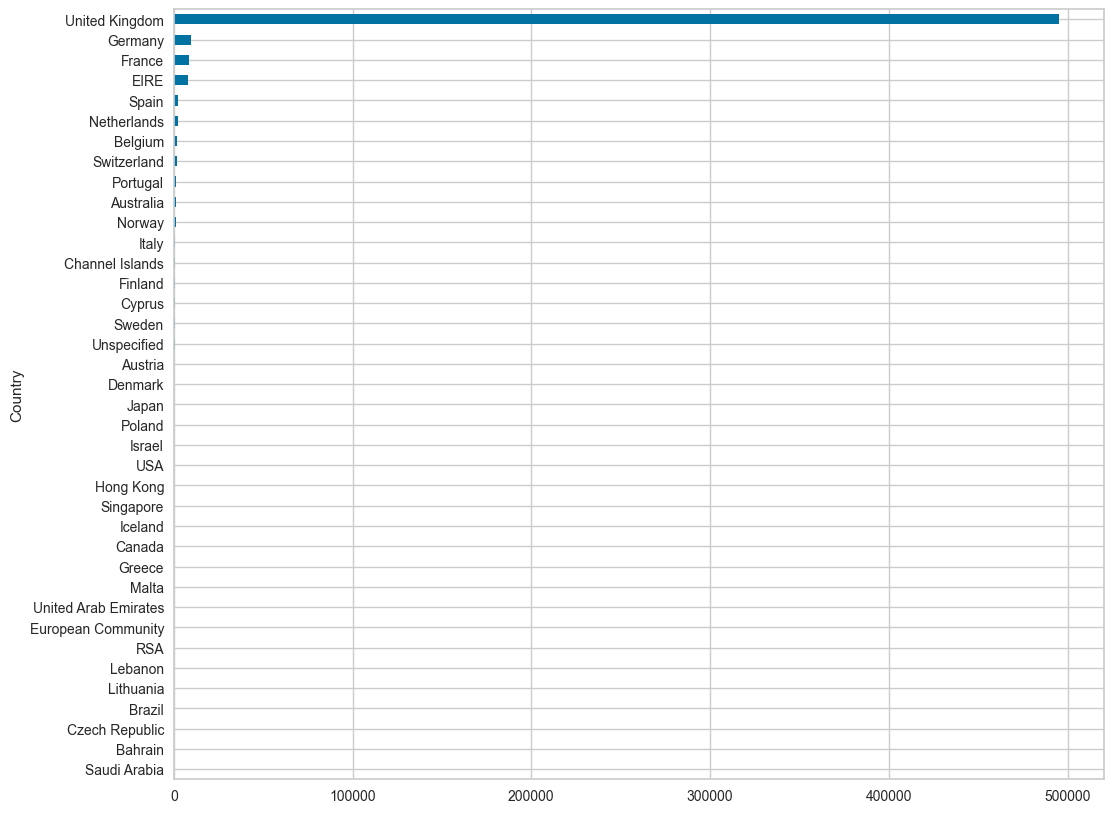

In [7]:
# Visualizando a contagem de ocorrências por país na coluna 'Country':

# Utilizando o método value_counts() do pandas para contar as ocorrências de cada país na coluna 'Country'.
# O parâmetro ascending=True é especificado para ordenar as barras horizontalmente em ordem ascendente.
# Utilizando o método plot.barh() do pandas para criar um gráfico de barras horizontal com a contagem de ocorrências por país.
# O parâmetro figsize=(12,10) define o tamanho da figura.
df['Country'].value_counts(ascending=True).plot.barh(figsize=(12,10))


In [8]:
# Obtendo estatísticas descritivas para as colunas 'Quantity' e 'UnitPrice' do DataFrame:

# Utilizando o método describe() do pandas para gerar estatísticas descritivas, como média, desvio padrão, mínimo, 25%, 50% (mediana), 75%, e máximo.
df[['Quantity', 'UnitPrice']].describe()


,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [9]:
# Obtendo a contagem de ocorrências por país utilizando a biblioteca sidetable:

# Utilizando a função stb.freq() da biblioteca sidetable para obter a contagem de ocorrências por país na coluna 'Country'.
df.stb.freq(['Country'])


,Country,count,percent,cumulative_count,cumulative_percent
0,United Kingdom,495478,91.431956,495478,91.431956
1,Germany,9495,1.752139,504973,93.184095
2,France,8557,1.579047,513530,94.763143
3,EIRE,8196,1.512431,521726,96.275574
4,Spain,2533,0.467422,524259,96.742996
5,Netherlands,2371,0.437527,526630,97.180523
6,Belgium,2069,0.381798,528699,97.562321
7,Switzerland,2002,0.369435,530701,97.931756
8,Portugal,1519,0.280305,532220,98.212061
9,Australia,1259,0.232327,533479,98.444388


In [10]:
# Contando os valores ausentes em cada coluna do DataFrame e ordenando em ordem decrescente:

# Utilizando o método isna() do pandas para identificar os valores ausentes em cada coluna.
# Em seguida, aplicando o método sum() para contar a quantidade de valores ausentes em cada coluna.
# Por fim, utilizando o método sort_values() com o parâmetro ascending=False para ordenar em ordem decrescente.
df.isna().sum().sort_values(ascending=False)


CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [11]:
# Contando as linhas duplicadas no DataFrame:

# Utilizando o método duplicated() do pandas para identificar linhas duplicadas no DataFrame.
# Em seguida, aplicando o método sum() para contar a quantidade total de linhas duplicadas.
df.duplicated().sum()


5268

## Data Preparation & Data Cleaning

In [12]:
# Obtendo informações sobre valores ausentes no DataFrame utilizando a biblioteca sidetable:

# Utilizando a função stb.missing() da biblioteca sidetable para gerar um resumo das colunas com valores ausentes no DataFrame.
df.stb.missing()


,missing,total,percent
CustomerID,135080,541909,24.926694
Description,1454,541909,0.268311
InvoiceNo,0,541909,0.000000
StockCode,0,541909,0.000000
Quantity,0,541909,0.000000
InvoiceDate,0,541909,0.000000
UnitPrice,0,541909,0.000000
Country,0,541909,0.000000


In [13]:
# Removendo linhas com valores ausentes na coluna 'CustomerID':

# Utilizando o método dropna() do pandas com o parâmetro subset=['CustomerID'] para remover as linhas que possuem valores ausentes na coluna 'CustomerID'.
df = df.dropna(subset=['CustomerID'])


In [14]:
# Verificando novamente informações sobre valores ausentes no DataFrame após a remoção de linhas:

# Utilizando a função stb.missing() da biblioteca sidetable para gerar um resumo das colunas com valores ausentes no DataFrame após a remoção das linhas com valores ausentes na coluna 'CustomerID'.
df.stb.missing()


,missing,total,percent
InvoiceNo,0,406829,0.0
StockCode,0,406829,0.0
Description,0,406829,0.0
Quantity,0,406829,0.0
InvoiceDate,0,406829,0.0
UnitPrice,0,406829,0.0
CustomerID,0,406829,0.0
Country,0,406829,0.0


In [15]:
# Convertendo a coluna 'InvoiceDate' para o formato de data e hora:

# Utilizando a função to_datetime() do pandas para converter a coluna 'InvoiceDate' para o formato de data e hora.
# O parâmetro format='%m/%d/%Y %H:%M' é especificado para indicar o formato da data na coluna.
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')


C:\Users\jorgi\AppData\Local\Temp\ipykernel_16692\1106622787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')


In [16]:
# Convertendo as colunas 'CustomerID' para o tipo de dados 'int64' e 'Country' para a categoria 'category':

# Utilizando o método astype() do pandas para converter a coluna 'CustomerID' para o tipo de dados 'int64'.
df['CustomerID'] = df['CustomerID'].astype('int64')

# Utilizando o método astype() do pandas para converter a coluna 'Country' para o tipo de dados 'category'.
df['Country'] = df['Country'].astype('category')


C:\Users\jorgi\AppData\Local\Temp\ipykernel_16692\1703313812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype('int64')
C:\Users\jorgi\AppData\Local\Temp\ipykernel_16692\1703313812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df['Country'].astype('category')


In [17]:
# Criando uma cópia do DataFrame:

# Utilizando o método copy() do pandas para criar uma cópia do DataFrame original.
df = df.copy()


In [18]:
# Obtendo informações atualizadas sobre o DataFrame:

# Utilizando o método info() do pandas para obter informações atualizadas sobre o DataFrame, incluindo tipos de dados, valores não nulos e uso de memória.
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 25.2+ MB


In [19]:
# Exibindo as primeiras linhas do DataFrame:

# Utilizando o método head() do pandas para exibir as primeiras linhas do DataFrame após as transformações.
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [20]:
# Removendo linhas onde 'Quantity' ou 'UnitPrice' são iguais ou menores que zero:

# Criando uma série booleana df_superior0 que indica se 'Quantity' ou 'UnitPrice' são iguais ou menores que zero em cada linha.
df_superior0 = df[['Quantity', 'UnitPrice']].le(0).any(axis=1)

# Utilizando a negação (~) e o método copy() para remover as linhas onde 'Quantity' ou 'UnitPrice' são iguais ou menores que zero.
df = df[~df_superior0].copy()


<Axes: >

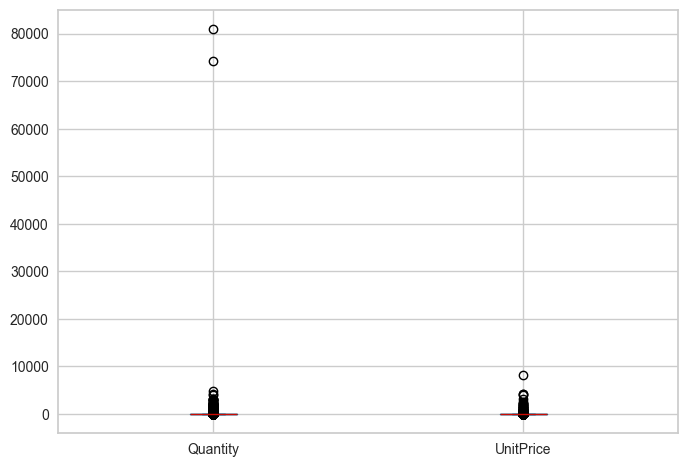

In [21]:
# Criando um gráfico de caixa (boxplot) para as colunas 'Quantity' e 'UnitPrice':

# Utilizando o método plot.box() do pandas para criar um gráfico de caixa (boxplot) que representa a distribuição das colunas 'Quantity' e 'UnitPrice'.
df[['Quantity', 'UnitPrice']].plot.box()


In [22]:
# Filtrando linhas onde 'Quantity' é maior que 10,000:

# Utilizando o método query() do pandas para filtrar as linhas onde 'Quantity' é maior que 10,000.
df.query('Quantity > 10_000')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


<Axes: >

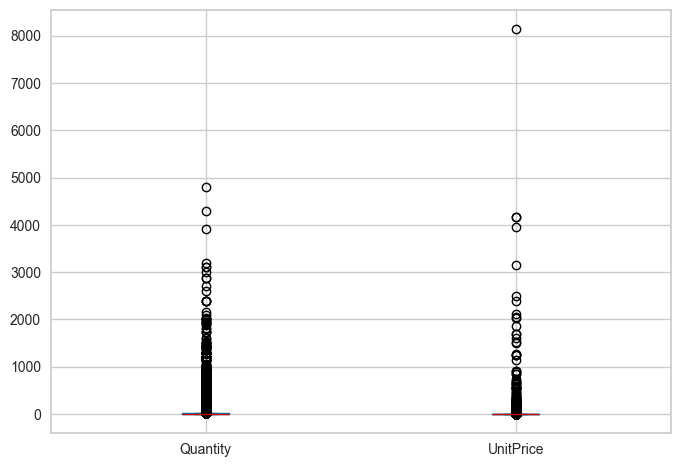

In [23]:
# Criando um gráfico de caixa (boxplot) para 'Quantity' e 'UnitPrice' após filtrar linhas onde 'Quantity' é menor que 10,000:

# Utilizando o método query() do pandas para filtrar as linhas onde 'Quantity' é menor que 10,000.
# Em seguida, selecionando as colunas 'Quantity' e 'UnitPrice' e criando um gráfico de caixa (boxplot) para essas colunas.
df.query('Quantity < 10_000')[['Quantity', 'UnitPrice']].plot.box()


In [24]:
# Filtrando linhas onde 'UnitPrice' é maior que 8,000:

# Utilizando o método query() do pandas para filtrar as linhas onde 'UnitPrice' é maior que 8,000.
df.query('UnitPrice > 8_000')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom


In [25]:
# Filtrando o DataFrame para manter linhas onde 'Quantity' é menor que 10,000 e 'UnitPrice' é menor que 8,000:

# Utilizando o método query() do pandas para filtrar o DataFrame e manter apenas as linhas onde 'Quantity' é menor que 10,000 e 'UnitPrice' é menor que 8,000.
# Em seguida, utilizando o método copy() para criar uma cópia do DataFrame resultante.
df = df.query('Quantity < 10_000 & UnitPrice < 8_000').copy()


In [26]:
# Criando a coluna 'Price_Total' calculada como o produto de 'Quantity' e 'UnitPrice':

# Utilizando o operador de multiplicação (*) para criar uma nova coluna 'Price_Total' no DataFrame, calculada como o produto de 'Quantity' e 'UnitPrice'.
df['Price_Total'] = df.Quantity * df.UnitPrice
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price_Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [27]:
# Criando um objeto Timestamp do pandas para a data '2012-01-01':

# Utilizando a classe Timestamp do pandas para criar um objeto representando a data '2012-01-01'.
pd.Timestamp('2012-01-01')


Timestamp('2012-01-01 00:00:00')

In [28]:
# Criando um DataFrame 'df_rfv' para análise RFV (Recency, Frequency, Value):

# Utilizando o método groupby() do pandas para agrupar o DataFrame original 'df' por 'CustomerID'.
# Em seguida, utilizando o método agg() para calcular as métricas Recency (R), Frequency (F) e Value (V) para cada grupo.
df_rfv = (
    df.groupby('CustomerID')
    .agg(
        R=('InvoiceDate', lambda x: (pd.Timestamp('2012-01-01') - x.max()).days),
        F=('InvoiceNo', 'nunique'),
        V=('Price_Total', 'mean')
    )
)

df_rfv


,R,F,V
CustomerID,,,
12347,24,7,23.681319
12348,97,4,57.975484
12349,40,1,24.076027
12350,332,1,19.670588
12352,58,8,29.482824
...,...,...,...
18280,299,1,18.060000
18281,202,1,11.545714
18282,29,2,14.837500


<Axes: >

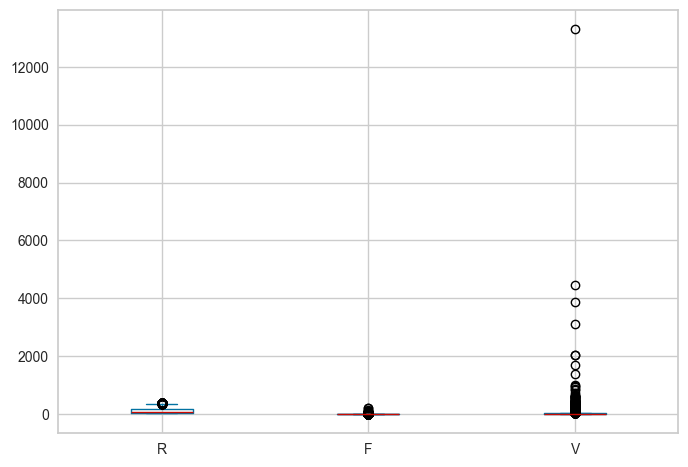

In [29]:
# Criando um gráfico de caixa (boxplot) para as métricas RFV:

# Utilizando o método plot.box() do pandas para criar um gráfico de caixa (boxplot) que representa a distribuição das métricas RFV no DataFrame 'df_rfv'.
df_rfv.plot.box()


<Axes: >

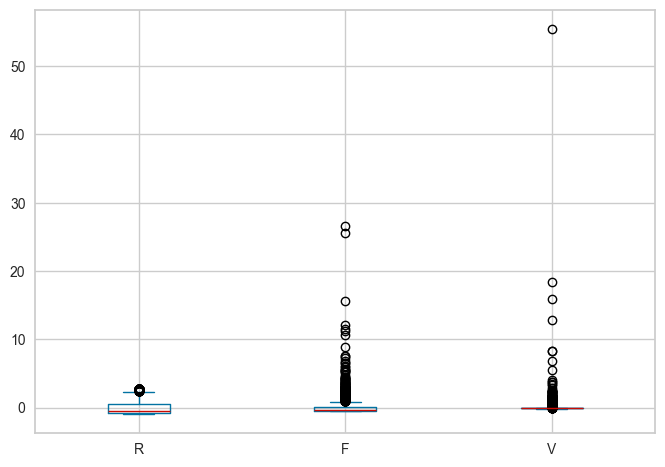

In [30]:
# Normalizando as métricas RFV e criando um gráfico de caixa (boxplot):

# Utilizando o método apply() do pandas para aplicar a normalização da escala (scale) nas métricas RFV do DataFrame 'df_rfv'.
# Em seguida, utilizando o método plot.box() para criar um gráfico de caixa (boxplot) das métricas normalizadas.
df_rfv.apply(scale).plot.box()


In [31]:
# Filtrando linhas onde a métrica 'V' é maior que 50 após normalização das métricas RFV:

# Utilizando o método apply() do pandas para aplicar a normalização da escala (scale) nas métricas RFV do DataFrame 'df_rfv'.
# Em seguida, utilizando o método query() para filtrar as linhas onde a métrica 'V' é maior que 50 após a normalização.
df_rfv.apply(scale).query('V > 50')


,R,F,V
CustomerID,,,
15098,0.899878,-0.165317,55.434876


In [32]:
# Filtrando o DataFrame para linhas onde 'CustomerID' é igual a 15098:

# Utilizando o método query() do pandas para filtrar o DataFrame e manter apenas as linhas onde 'CustomerID' é igual a 15098.
df.query('CustomerID == 15098')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price_Total
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:22:00,4.95,15098,United Kingdom,297.0
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.0
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.50,15098,United Kingdom,649.5


In [33]:
# Exibindo o DataFrame 'df_rfv':

# Exibindo o DataFrame 'df_rfv', que contém as métricas Recency (R), Frequency (F) e Value (V) calculadas para cada 'CustomerID'.
df_rfv


,R,F,V
CustomerID,,,
12347,24,7,23.681319
12348,97,4,57.975484
12349,40,1,24.076027
12350,332,1,19.670588
12352,58,8,29.482824
...,...,...,...
18280,299,1,18.060000
18281,202,1,11.545714
18282,29,2,14.837500


In [34]:
# Removendo a linha correspondente ao 'CustomerID' 15098 do DataFrame 'df_rfv':

# Utilizando o método drop() do pandas para remover a linha correspondente ao 'CustomerID' 15098 do DataFrame 'df_rfv'.
df_rfv = df_rfv.drop(15098)


<Axes: >

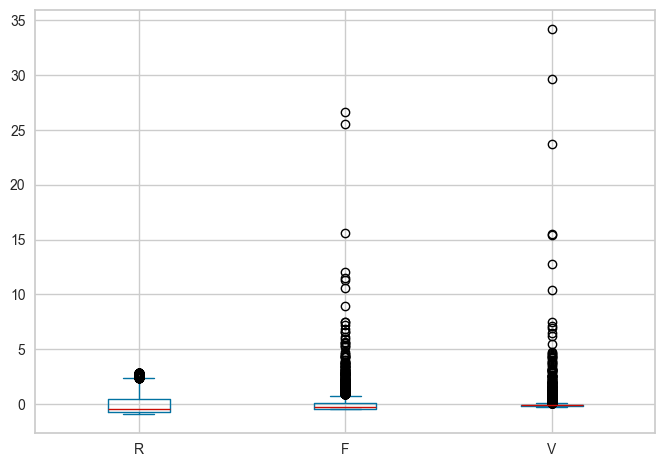

In [35]:
# Criando um gráfico de caixa (boxplot) para as métricas RFV após normalização, excluindo o 'CustomerID' 15098:

# Utilizando o método apply() do pandas para aplicar a normalização da escala (scale) nas métricas RFV do DataFrame 'df_rfv', excluindo o 'CustomerID' 15098.
# Em seguida, utilizando o método plot.box() para criar um gráfico de caixa (boxplot) das métricas normalizadas.
df_rfv.apply(scale).plot.box()


In [36]:
# Criando um objeto 'scaler' da classe PowerTransformer:

# Instanciando um objeto da classe PowerTransformer do scikit-learn para ser utilizado na transformação dos dados.
scaler = PowerTransformer()


In [37]:
# Aplicando a transformação de potência nas métricas RFV e criando um novo DataFrame escalado:

# Utilizando o método fit_transform() do objeto 'scaler' para aplicar a transformação de potência nas métricas RFV do DataFrame 'df_rfv'.
# Em seguida, criando um novo DataFrame 'df_rfv_scaled' com os dados transformados e mantendo os mesmos índices e colunas.
df_rfv_scaled = pd.DataFrame(scaler.fit_transform(df_rfv), index=df_rfv.index, columns=df_rfv.columns)
df_rfv_scaled


,R,F,V
CustomerID,,,
12347,-1.563219,1.201866,0.407836
12348,0.323470,0.660670,1.329304
12349,-0.809134,-1.158070,0.426829
12350,1.568467,-1.158070,0.189376
12352,-0.307718,1.309671,0.653411
...,...,...,...
18280,1.475652,-1.158070,0.085562
18281,1.107356,-1.158070,-0.491003
18282,-1.275046,-0.195707,-0.161007


<Axes: >

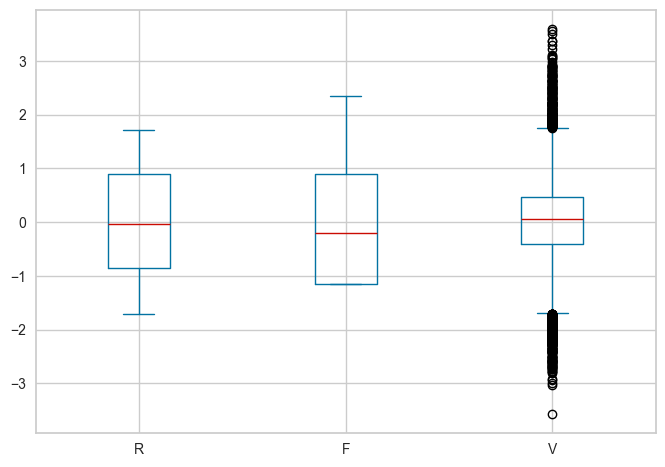

In [38]:
# Criando um gráfico de caixa (boxplot) para as métricas RFV após a transformação de potência:

# Utilizando o método plot.box() do pandas para criar um gráfico de caixa (boxplot) das métricas normalizadas e transformadas de potência no DataFrame 'df_rfv_scaled'.
df_rfv_scaled.plot.box()


## Data Modeling & Model Evaluation

In [39]:
# Descrevendo estatísticas resumidas das métricas RFV no DataFrame original 'df_rfv':

# Utilizando o método describe() do pandas para exibir estatísticas resumidas das métricas Recency (R), Frequency (F) e Value (V) no DataFrame 'df_rfv'.
df_rfv.describe()


,R,F,V
count,4336.000000,4336.000000,4336.000000
mean,114.032288,4.272601,34.554185
std,99.968352,7.697927,129.202663
min,22.000000,1.000000,1.450000
25%,39.000000,1.000000,12.339095
50%,72.000000,2.000000,17.715999
75%,163.250000,5.000000,24.843993
max,395.000000,209.000000,4453.430000


In [40]:
# Limitando os valores superiores das métricas RFV utilizando o método clip() e exibindo estatísticas resumidas:

# Utilizando o método apply() do pandas para aplicar a função clip() nas métricas RFV do DataFrame 'df_rfv', limitando os valores superiores ao percentil 95.
# Em seguida, utilizando o método describe() do pandas para exibir estatísticas resumidas do DataFrame 'df_rfv_clip' após a aplicação do clip().
df_rfv_clip = df_rfv.apply(lambda x: x.clip(upper=x.quantile(.95)))
df_rfv_clip.describe()


,R,F,V
count,4336.000000,4336.000000,4336.000000
mean,112.248155,3.608164,23.634656
std,95.504576,3.358999,20.993635
min,22.000000,1.000000,1.450000
25%,39.000000,1.000000,12.339095
50%,72.000000,2.000000,17.715999
75%,163.250000,5.000000,24.843993
max,333.000000,13.000000,91.768421


In [41]:
# Aplicando a normalização de escala nas métricas RFV após a limitação dos valores superiores:

# Utilizando o método apply() do pandas para aplicar a normalização de escala (scale) nas métricas RFV do DataFrame 'df_rfv_clip'.
# O resultado é armazenado no DataFrame 'df_rfv_clip_scaled'.
df_rfv_clip_scaled = df_rfv_clip.apply(scale)


C:\Users\jorgi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jorgi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jorgi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

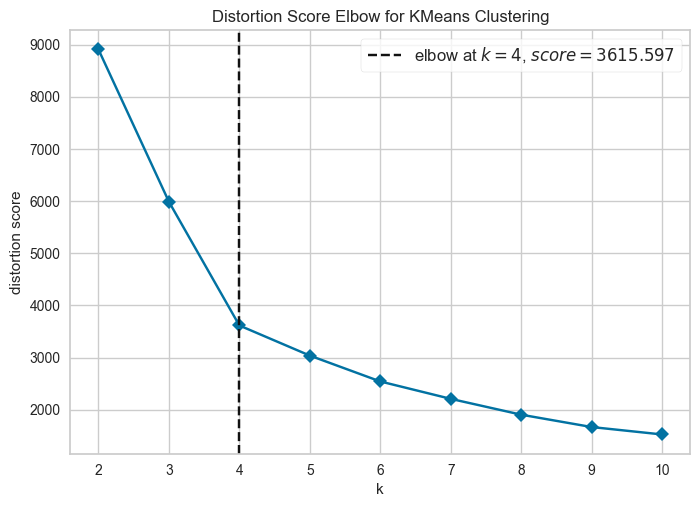

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [42]:
# Visualizando o "Elbow Method" para determinar o número ideal de clusters no algoritmo K-Means:

# Utilizando a função kelbow_visualizer da biblioteca Yellowbrick para visualizar o "Elbow Method" e determinar o número ideal de clusters no K-Means.
# O método kelbow_visualizer recebe como parâmetros o modelo KMeans(), os dados normalizados e o número máximo de clusters (k=10).
# O parâmetro timings=False é utilizado para não exibir os tempos de execução.
kelbow_visualizer(KMeans(), df_rfv_clip_scaled, k=10, timings=False)


In [43]:
# Avaliando métricas de desempenho para diferentes números de clusters no K-Means:

# Definindo uma lista de métricas de desempenho de clusters (silhouette_score, davies_bouldin_score, calinski_harabasz_score).
# Iterando sobre diferentes números de clusters de 2 a 10 e calculando as métricas para cada configuração.
# Os resultados são armazenados em um DataFrame chamado 'cluster_metrics_results'.
# O DataFrame exibe o número de clusters, inércia, silhouette_score, davies_bouldin_score e calinski_harabasz_score para cada configuração.
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = df_rfv_clip_scaled.copy()

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=0)
    labels = model.fit_predict(X)
    cluster_results_dict = {'k': k}
    cluster_results_dict['inertia'] = model.inertia_
    for metric in cluster_metrics:
        cluster_results_dict[metric.__name__] = metric(X, labels)
    cluster_metrics_results.append(cluster_results_dict)

# Criando um DataFrame a partir dos resultados e exibindo uma tabela estilizada com a função style.background_gradient().
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()


C:\Users\jorgi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jorgi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jorgi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,8906.596605,0.382311,1.065369,1995.770793
3,5987.858046,0.434196,0.858749,2539.996344
4,3615.611638,0.479553,0.704462,3751.144746
5,3038.336417,0.484900,0.737632,3552.816991
6,2542.520604,0.397827,0.851265,3564.615894
7,2209.185328,0.376864,0.870175,3526.795460
8,1905.647286,0.383621,0.870313,3602.149321
9,1668.788329,0.394132,0.800834,3675.183274
10,1516.606127,0.351681,0.887909,3642.033280


In [44]:
# Aplicando o algoritmo K-Means com 4 clusters aos dados normalizados e cortados
kmeans = KMeans(4)
kmeans_labels = kmeans.fit_predict(df_rfv_clip_scaled)


C:\Users\jorgi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [45]:
# Criando um gráfico 3D de dispersão com as variáveis R, F e V, colorindo os pontos de acordo com os rótulos atribuídos pelo K-Means
# Utilizando a biblioteca Plotly Express e a paleta de cores 'plotly_dark'
px.scatter_3d(df_rfv_clip, x='R', y='F', z='V', color=kmeans_labels.astype(str), template='plotly_dark')


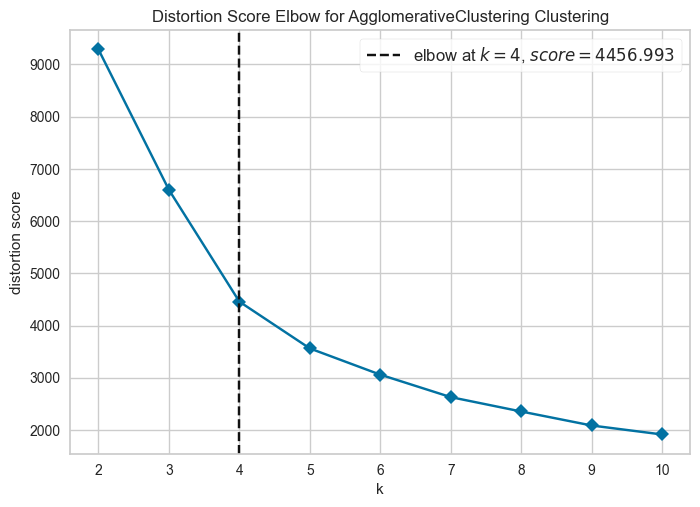

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=AgglomerativeClustering(n_clusters=10),
                 timings=False)

In [49]:
# Utilizando a visualização de cotovelo para determinar o número ideal de clusters no Hierarchical Clustering
kelbow_visualizer(AgglomerativeClustering(), df_rfv_clip_scaled, k=10, timings=False)


In [51]:
# Avaliando o desempenho do Hierarchical Clustering com diferentes números de clusters
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2, 11):
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(df_rfv_clip_scaled)
    cluster_results_dict = {'k': k}
    for metric in cluster_metrics:
        cluster_results_dict[metric.__name__] = metric(df_rfv_clip_scaled, labels)
    cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()


,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,
2,0.361292,1.331666,1737.623791
3,0.398928,0.869855,2104.783905
4,0.431886,0.761966,2770.399918
5,0.342136,0.897329,2872.239315
6,0.348298,0.791909,2816.854970
7,0.322680,0.844326,2848.491623
8,0.287643,0.967432,2799.001327
9,0.286883,0.976982,2832.797336
10,0.298923,0.953087,2786.657350


In [56]:
# Aplicando Hierarchical Clustering com 4 clusters ao DataFrame normalizado
hclut = AgglomerativeClustering(n_clusters=4)
hclut_labels = hclut.fit_predict(df_rfv_clip_scaled)


In [57]:
# Criando um gráfico 3D de dispersão para visualizar os clusters gerados pelo Hierarchical Clustering
px.scatter_3d(df_rfv_clip, x='R', y='F', z='V', color=hclut_labels.astype(str), template='plotly_dark')


In [67]:
# Realizando uma análise de Modelagem de Misturas Gaussianas (Gaussian Mixture Model - GMM) para encontrar o melhor modelo
results = []
k_range = range(1, 9)
covariance_types = ['full', 'tied', 'diag', 'spherical']
X = df_rfv_clip_scaled.copy()

for n_components in k_range:
    for covariance_type in covariance_types:
        mclust = GaussianMixture(n_components=n_components, n_init=10, covariance_type=covariance_type)
        mclust.fit(X)
        results.append({
            'bic': mclust.bic(X),
            'n_components': n_components,
            'covariance_type': covariance_type,
        })

# Exibindo os resultados ordenados pelo Critério de Informação Bayesiano (BIC)
results_df = pd.DataFrame(results)
best_model_params = results_df.sort_values('bic').head()
best_model_params


,bic,n_components,covariance_type
30,-92.997419,8,diag
28,-46.593304,8,full
26,211.294215,7,diag
24,2173.620224,7,full
22,9012.702712,6,diag


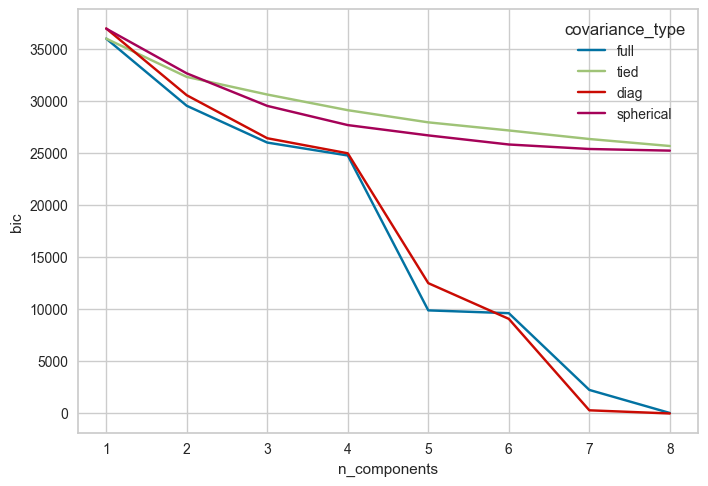

In [68]:
# Visualizando o Critério de Informação Bayesiano (BIC) em função do número de componentes para diferentes tipos de covariância
sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type');


In [74]:
# Criando um modelo de Mistura Gaussiana com 5 componentes e tipo de covariância 'full'
mclust = GaussianMixture(n_components=5, covariance_type='full', n_init=10)

# Realizando a clusterização usando o modelo
mclust_labels = mclust.fit_predict(df_rfv_clip_scaled)


In [75]:
# Criando um gráfico 3D de dispersão usando Plotly Express para visualizar os clusters obtidos pelo modelo de Mistura Gaussiana
px.scatter_3d(df_rfv_clip, x='R', y='F', z='V', color=mclust_labels.astype(str), template='plotly_dark')


## Interpretando clusters

In [76]:
# Obtendo os centros dos clusters para o modelo K-Means
centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_rfv_clip_scaled.columns)


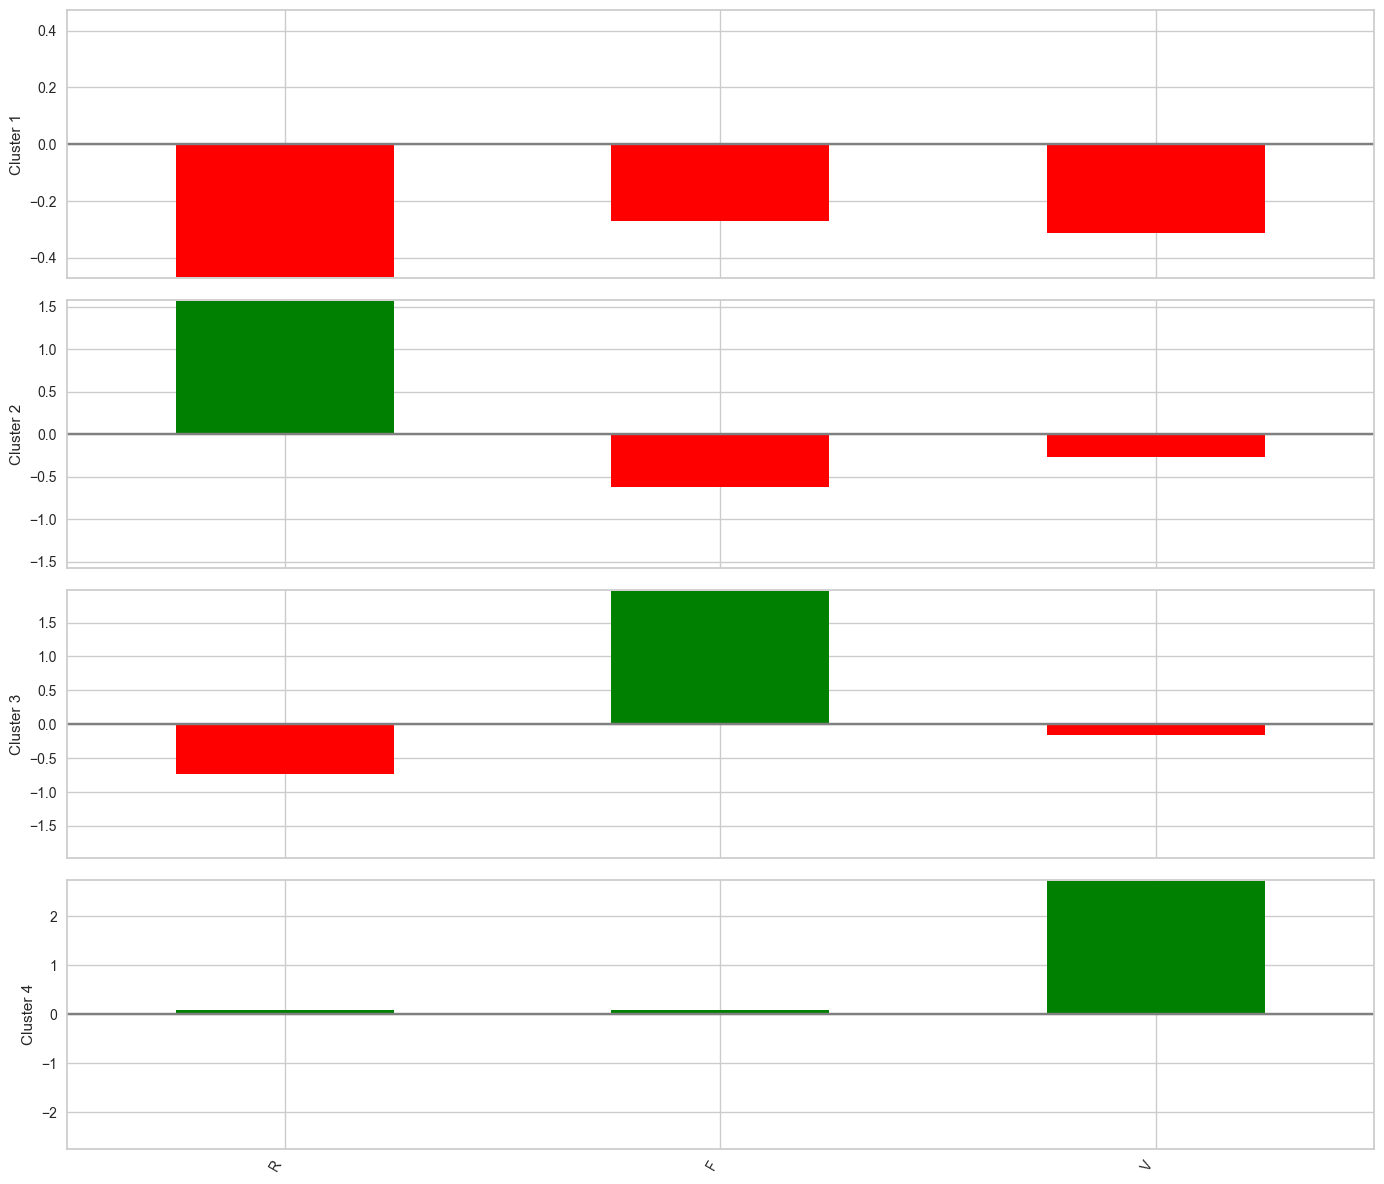

In [80]:
# Criando um gráfico de barras empilhadas para visualizar os centros dos clusters (K-Means)
fig, axes = plt.subplots(nrows=4, figsize=(14, 12), sharex=True)

for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 1.01 * center.abs().max()
    colors = ['green' if l > 0 else 'red' for l in center]
    center.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'Cluster {i+1}')
    ax.set_ylim(-maxPC, maxPC)
    ax.axhline(color='gray')
    ax.xaxis.set_ticks_position('none')

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()


In [82]:
# Criando um DataFrame resumido para visualizar a média de cada variável nos clusters (K-Means)
(
    df_rfv_clip.assign(cluster=kmeans_labels)
    .groupby('cluster')
    .mean()
    .transpose()
    .style.background_gradient(cmap='YlOrRd', axis=1)
)


cluster,0,1,2,3
R,67.523221,261.082051,41.517018,121.057935
F,2.703877,1.509744,10.191248,3.876574
V,17.120301,18.104189,20.426973,80.714098


In [95]:
# Agregando estatísticas descritivas para cada variável nos clusters (K-Means)
(
  df_rfv_clip.assign(cluster=kmeans_labels)
  .groupby('cluster')
  .agg(['mean','min','median','max'])
)


R                           F                         V  \
               mean  min median  max       mean min median max       mean   
cluster                                                                     
0         67.523221   22   58.0  176   2.703877   1    2.0   6  17.120301   
1        261.082051  159  263.0  333   1.509744   1    1.0   8  18.104189   
2         41.517018   22   32.0  333  10.191248   7   10.0  13  20.426973   
3        121.057935   22   93.0  333   3.876574   1    2.0  13  80.714098   

                                          
               min     median        max  
cluster                                   
0         2.150588  16.817089  50.427000  
1         1.450000  16.850000  65.883333  
2         2.760622  18.380459  76.534858  
3        49.040000  91.768421  91.768421

## Insights

# Insights obtidos durante a criação do modelo de Análise das Métricas

## Análise dos Resultados do RFV (Recency, Frequency, and Monetary Value) por Cluster

### Cluster 0:
- **Tempo para Retorno (R):** Média = 67 dias, indicando que, em média, os clientes deste cluster fizeram uma compra há cerca de 67 dias.
- **Frequência (F):** Média = 2,70, indicando baixa frequência de compras.
- **Valor Monetário (M):** Média = 17,12, indicando gastos relativamente baixos.

**Perfil de Compra:**
Clientes neste cluster parecem ter feito compras há algum tempo, compram com pouca frequência e gastam menos em comparação com outros clusters.

### Cluster 1:
- **Tempo para Retorno (R):** Média = 261 dias, indicando maior tempo desde a última compra.
- **Frequência (F):** Média = 1,51, indicando frequência de compras muito baixa.
- **Valor Monetário (M):** Média = 18,10, indicando nível moderado de gastos.

**Perfil de Compra:**
Clientes deste cluster não compram com frequência, e houve um grande intervalo desde a última compra. No entanto, quando compram, tendem a gastar uma quantia moderada.

### Cluster 2:
- **Tempo para Retorno (R):** Média = 41 dias, indicando compras recentes.
- **Frequência (F):** Média = 10,19, indicando alta frequência de compras.
- **Valor Monetário (M):** Média = 20,43, indicando gastos moderados.

**Perfil de Compra:**
Clientes neste cluster compram frequentemente e recentemente, gastando uma quantia moderada. Parece ser um grupo ativo de compradores.

### Cluster 3:
- **Tempo para Retorno (R):** Média = 121 dias, indicando um tempo moderado desde a última compra.
- **Frequência (F):** Média = 3,88, indicando frequência moderada de compras.
- **Valor Monetário (M):** Média = 80,71, indicando gastos elevados.

**Perfil de Compra:**
Clientes neste cluster têm um valor monetário significativamente mais alto em comparação com outros clusters. Compram moderadamente frequentemente, e o tempo desde a última compra é moderado.

## Justificativa e Utilidade para a Empresa

### a. Segmentação de Clientes:
Essa análise permite à empresa identificar diferentes comportamentos de compra entre os clientes. Por exemplo, o Cluster 2 representa clientes ativos e frequentes, enquanto o Cluster 1 indica clientes inativos. A empresa pode personalizar suas estratégias com base nesses comportamentos.

### b. Personalização de Campanhas de Marketing:
Para o Cluster 0, a empresa pode criar campanhas para incentivar compras mais frequentes. Para o Cluster 3, estratégias de retenção e upselling podem ser eficazes, aproveitando o alto valor monetário.

### c. Ações Possíveis:
- **Cluster 0:** Ofertas especiais para compras frequentes, programas de fidelidade.
- **Cluster 1:** Campanhas de reativação, ofertas exclusivas para incentivar novas compras.
- **Cluster 2:** Comunicações regulares, programas de recomendação, promoções sazonais.
- **Cluster 3:** Programas VIP, ofertas exclusivas, experiências premium.

Essas ações podem ser ajustadas com base na evolução do comportamento do cliente ao longo do tempo.
